In [35]:
from dataset import ImageDataset
import torch
from torchvision import transforms

test_transforms = transforms.Compose(
    [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

ROOT1 = '/NEW_EDS/JJ_Group/xutd/StableSR/out'
ROOT2 = '/NEW_EDS/JJ_Group/xutd/diffusion-inversion/results/imagenet/srx8/tmp/recon'

dataset1 = ImageDataset(root=ROOT1, transform=test_transforms, return_path=True)
dataloader1 = torch.utils.data.DataLoader(dataset1, batch_size=1, shuffle=False)

dataset2 = ImageDataset(root=ROOT2, transform=test_transforms, return_path=True)
dataloader2 = torch.utils.data.DataLoader(dataset2, batch_size=1, shuffle=False)

def get_var(dataloader):
    xs = []
    for (x, _) in dataloader:
        xs.append(x)
    xs = torch.cat(xs, dim=0)
    return torch.std(xs, dim=0)

tensor(0.1080) tensor(0.0453)


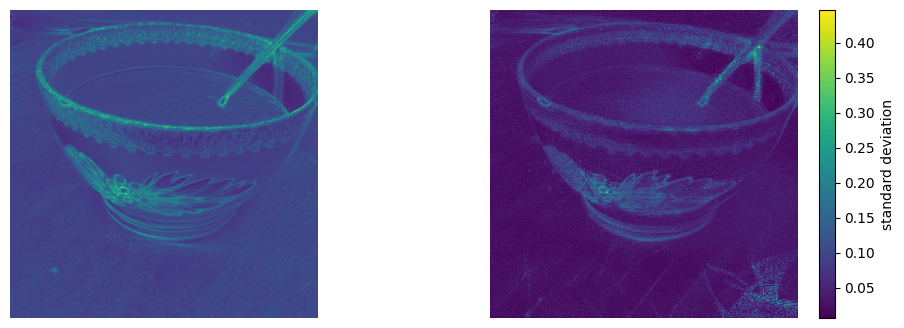

In [36]:
import matplotlib.pyplot as plt

var1 = get_var(dataloader1)
var2 = get_var(dataloader2)
var_min = torch.min(torch.cat([var1, var2]))
var_max = torch.max(torch.cat([var1, var2]))

print(torch.mean(var1), torch.mean(var2))
var1s = torch.mean(var1, dim=0)
var2s = torch.mean(var2, dim=0)
fig, axs = plt.subplots(1,2,figsize=(12, 4))
axs[0].imshow(var1s, vmin=var_min, vmax=var_max)
axs[1].imshow(var2s, vmin=var_min, vmax=var_max)

axs[0].axis('off')
axs[1].axis('off')

plot = axs[1].pcolor(var2s, vmin=var_min, vmax=var_max)
plt.colorbar(plot, label='standard deviation')

plt.show()

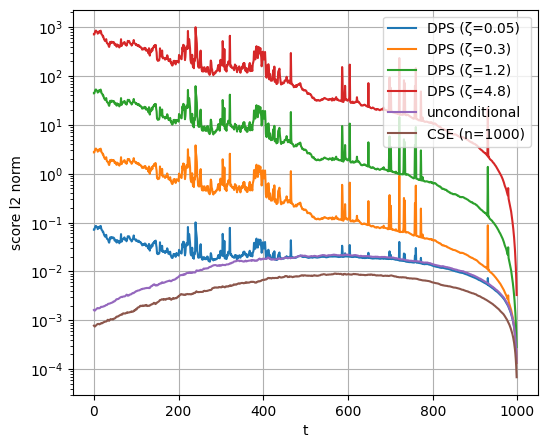

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
dist_dict_0_01 = torch.load('./results/dists_0.01.pt')
dist_dict_0_05 = torch.load('./results/dists_0.05.pt')
dist_dict_0_3 = torch.load('./results/dists_0.3.pt')
dist_dict_1_2 = torch.load('./results/dists_1.2.pt')
dist_dict_4_8 = torch.load('./results/dists_4.8.pt')
fig, axs = plt.subplots(1,1,figsize=(6, 5))
dist_dict_4_8['dists_dps'] = dist_dict_4_8['dists_dps'].cpu().numpy()
dist_dict_1_2['dists_dps'] = dist_dict_1_2['dists_dps'].cpu().numpy()
dist_dict_0_3['dists_dps'] = dist_dict_0_3['dists_dps'].cpu().numpy()
dist_dict_0_05['dists_dps'] = dist_dict_0_05['dists_dps'].cpu().numpy()
dist_dict_0_01['dists_dps'] = dist_dict_0_01['dists_dps'].cpu().numpy()
dist_dict_1_2['dists_uncond'] = dist_dict_1_2['dists_uncond'].cpu().numpy()
dist_dict_1_2['dists_cn'] = dist_dict_1_2['dists_cn'].cpu().numpy()
ts = np.arange(999)
axs.plot(ts, dist_dict_0_05['dists_dps'], label='DPS (ζ=0.05)')
axs.plot(ts, dist_dict_0_3['dists_dps'], label='DPS (ζ=0.3)')
axs.plot(ts, dist_dict_1_2['dists_dps'], label='DPS (ζ=1.2)')
axs.plot(ts, dist_dict_4_8['dists_dps'], label='DPS (ζ=4.8)')
# axs.plot(ts, dist_dict_0_01['dists_dps'], label='DPS score (scale = 0.01)')
axs.plot(ts, dist_dict_1_2['dists_uncond'], label='unconditional')
axs.plot(ts, dist_dict_1_2['dists_cn'], label='CSE (n=1000)')
axs.set_yscale('log')
axs.set_ylabel("score l2 norm")
axs.set_xlabel("t")
axs.legend()
axs.grid()
plt.savefig('fig_se.pdf', bbox_inches='tight')
plt.show()


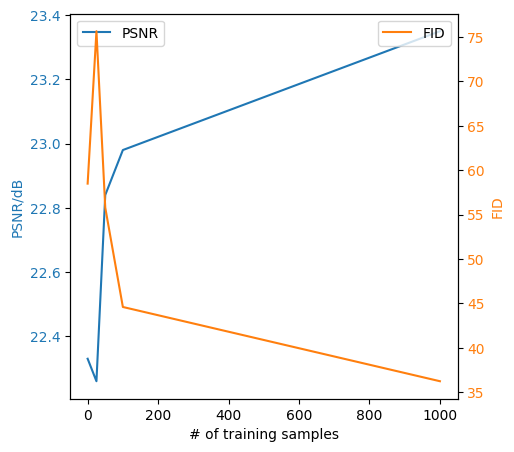

In [29]:
import matplotlib.pyplot as plt
import numpy as np

n_count = np.array([0, 25, 50, 100, 1000])
psnr = np.array([22.33, 22.26, 22.84, 22.98, 23.35])
fid = np.array([58.48, 75.64, 55.78, 44.59, 36.23])
fig, ax1 = plt.subplots(1,1,figsize=(5, 5))
ax1.plot(n_count, psnr, color="tab:blue", label="PSNR")
ax1.set_xlabel("# of training samples")
ax1.set_ylabel('PSNR/dB', color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(n_count, fid, color="tab:orange", label="FID")
ax2.set_ylabel('FID', color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")
ax2.legend()
plt.savefig("cover.pdf")
plt.show()